In [1]:
# load BaseballDataBank.py
import pandas as pd
import glob, os
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Reading in BaseballDatabank csv files

In [2]:
%ls baseballdatabank/core

Parameter format not correct - "core".


In [3]:
def read_all_databank_core_csv(directory):
    """
    read all csv files in the specified baseball databank directory and
    populate a dictionary storing each of the tables keyed to its name
    """
    dfs = {}
    files = glob.glob('{}/*.csv'.format(directory))
    for f in files:
        d, name = os.path.split(f)
        table = os.path.splitext(name)[0]
        df = pd.read_csv(f)
        dfs[table] = df
    return dfs

bbdfs = read_all_databank_core_csv('baseballdatabank/core')

# extract a few for further processing
batting = bbdfs['Batting']
pitching = bbdfs['Pitching']
teams = bbdfs['Teams']

## Taking a peek
### batting is year-by-year for each individual player
### teams is year-by-year for each team

In [4]:
pd.options.display.max_colwidth = 350

In [5]:
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,13.0,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,19.0,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,27.0,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,16.0,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0


In [6]:
pitching.columns

Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'W', 'L', 'G', 'GS',
       'CG', 'SHO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'SO', 'BAOpp',
       'ERA', 'IBB', 'WP', 'HBP', 'BK', 'BFP', 'GF', 'R', 'SH', 'SF', 'GIDP'],
      dtype='object')

In [7]:
teams.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


## Adding derived data: calculating singles (1B) from H,2B,3B,HR

In [8]:
batting['1B'] = batting['H'] - batting['2B'] - batting['3B'] - batting['HR']
teams['1B'] = teams['H'] - teams['2B'] - teams['3B'] - teams['HR']
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,abercda01,1871,1,TRO,NaN,1,4,0,0,0,...,0.0,0.0,0,0.0,NaN,NaN,NaN,NaN,0.0,0
1,addybo01,1871,1,RC1,NaN,25,118,30,32,6,...,8.0,1.0,4,0.0,NaN,NaN,NaN,NaN,0.0,26
2,allisar01,1871,1,CL1,NaN,29,137,28,40,4,...,3.0,1.0,2,5.0,NaN,NaN,NaN,NaN,1.0,31
3,allisdo01,1871,1,WS3,NaN,27,133,28,44,10,...,1.0,1.0,0,2.0,NaN,NaN,NaN,NaN,0.0,30
4,ansonca01,1871,1,RC1,NaN,25,120,29,39,11,...,6.0,2.0,2,1.0,NaN,NaN,NaN,NaN,0.0,25


## Filtering data (Hank Aaron's year-by-year batting statistics)

In [9]:
batting[batting.playerID=='aaronha01']

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
36886,aaronha01,1954,1,ML1,NL,122,468,58,131,27,...,2.0,2.0,28,39.0,NaN,3.0,6.0,4.0,13.0,85
37462,aaronha01,1955,1,ML1,NL,153,602,105,189,37,...,3.0,1.0,49,61.0,5.0,3.0,7.0,4.0,20.0,116
38117,aaronha01,1956,1,ML1,NL,153,609,106,200,34,...,2.0,4.0,37,54.0,6.0,2.0,5.0,7.0,21.0,126
38738,aaronha01,1957,1,ML1,NL,151,615,118,198,27,...,1.0,1.0,57,58.0,15.0,0.0,0.0,3.0,13.0,121
39353,aaronha01,1958,1,ML1,NL,153,601,109,196,34,...,4.0,1.0,59,49.0,16.0,1.0,0.0,3.0,21.0,128
39991,aaronha01,1959,1,ML1,NL,154,629,116,223,46,...,8.0,0.0,51,54.0,17.0,4.0,0.0,9.0,19.0,131
40623,aaronha01,1960,1,ML1,NL,153,590,102,172,20,...,16.0,7.0,60,63.0,13.0,2.0,0.0,12.0,8.0,101
41260,aaronha01,1961,1,ML1,NL,155,603,115,197,39,...,21.0,9.0,56,64.0,20.0,2.0,1.0,9.0,16.0,114
41958,aaronha01,1962,1,ML1,NL,156,592,127,191,28,...,15.0,7.0,66,73.0,14.0,3.0,0.0,6.0,14.0,112
42718,aaronha01,1963,1,ML1,NL,161,631,121,201,29,...,31.0,5.0,78,94.0,18.0,0.0,0.0,5.0,11.0,124


## Aggregating data (Hank Aaron's career batting statistics)

In [10]:
batting[batting.playerID=='aaronha01'].sum(numeric_only=True).drop(['yearID']).astype(int)

stint       23
G         3298
AB       12364
R         2174
H         3771
2B         624
3B          98
HR         755
RBI       2297
SB         240
CS          73
BB        1402
SO        1383
IBB        293
HBP         32
SH          21
SF         121
GIDP       328
1B        2294
dtype: int32

## A succinct history of hitting in baseball
### (time progresses from light to dark)

In [11]:
batting_by_year = batting.groupby('yearID').sum().reset_index()
hit_vars = ['1B', '2B', '3B', 'HR', 'SO', 'BB']

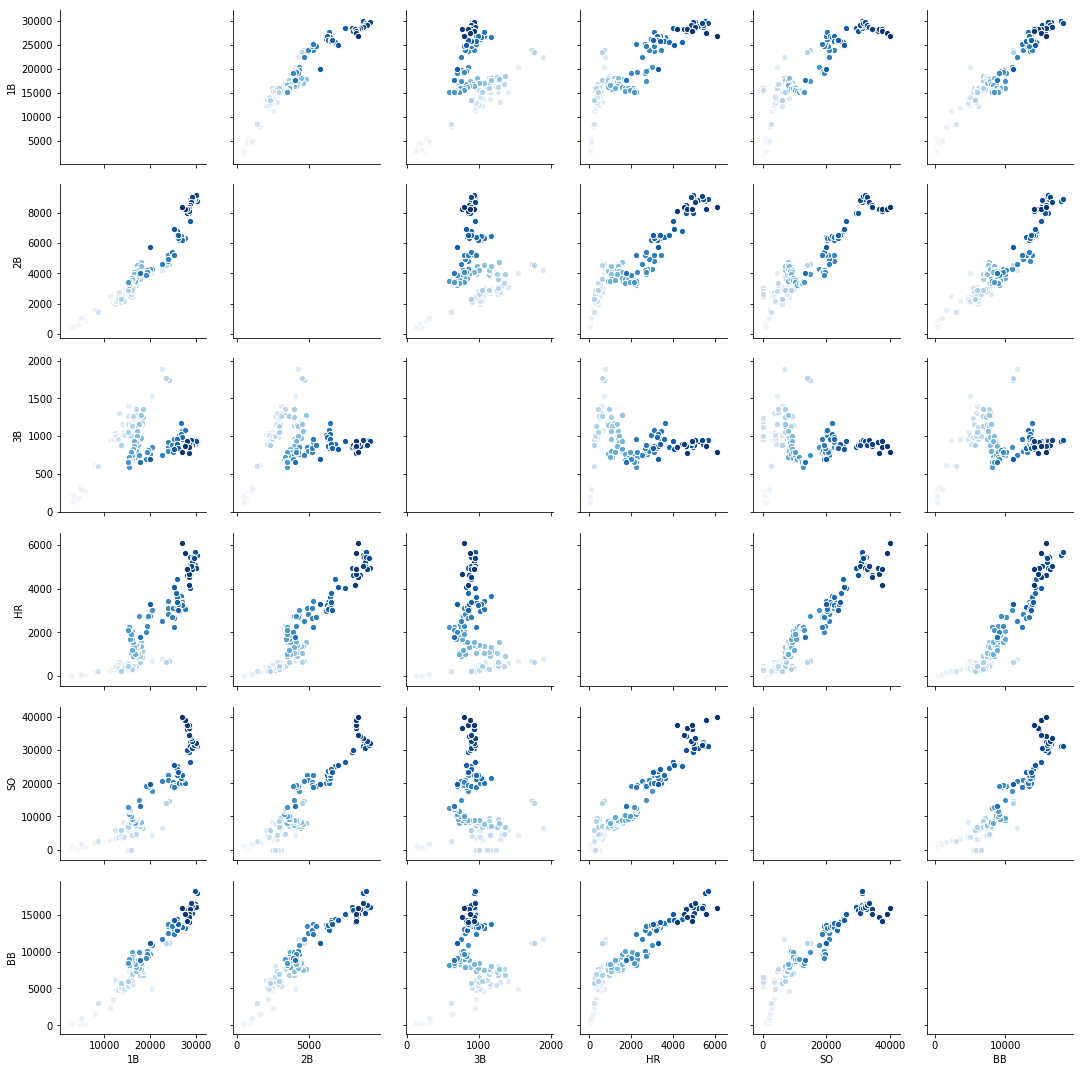

In [12]:
#pg = sns.pairplot(batting_by_year, size=2, vars=hit_vars, hue='yearID', palette='Blues')
#pg.hue_names = ["_nolegend_"]
g = sns.PairGrid(batting_by_year, vars=hit_vars, hue='yearID', palette='Blues')
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=40)

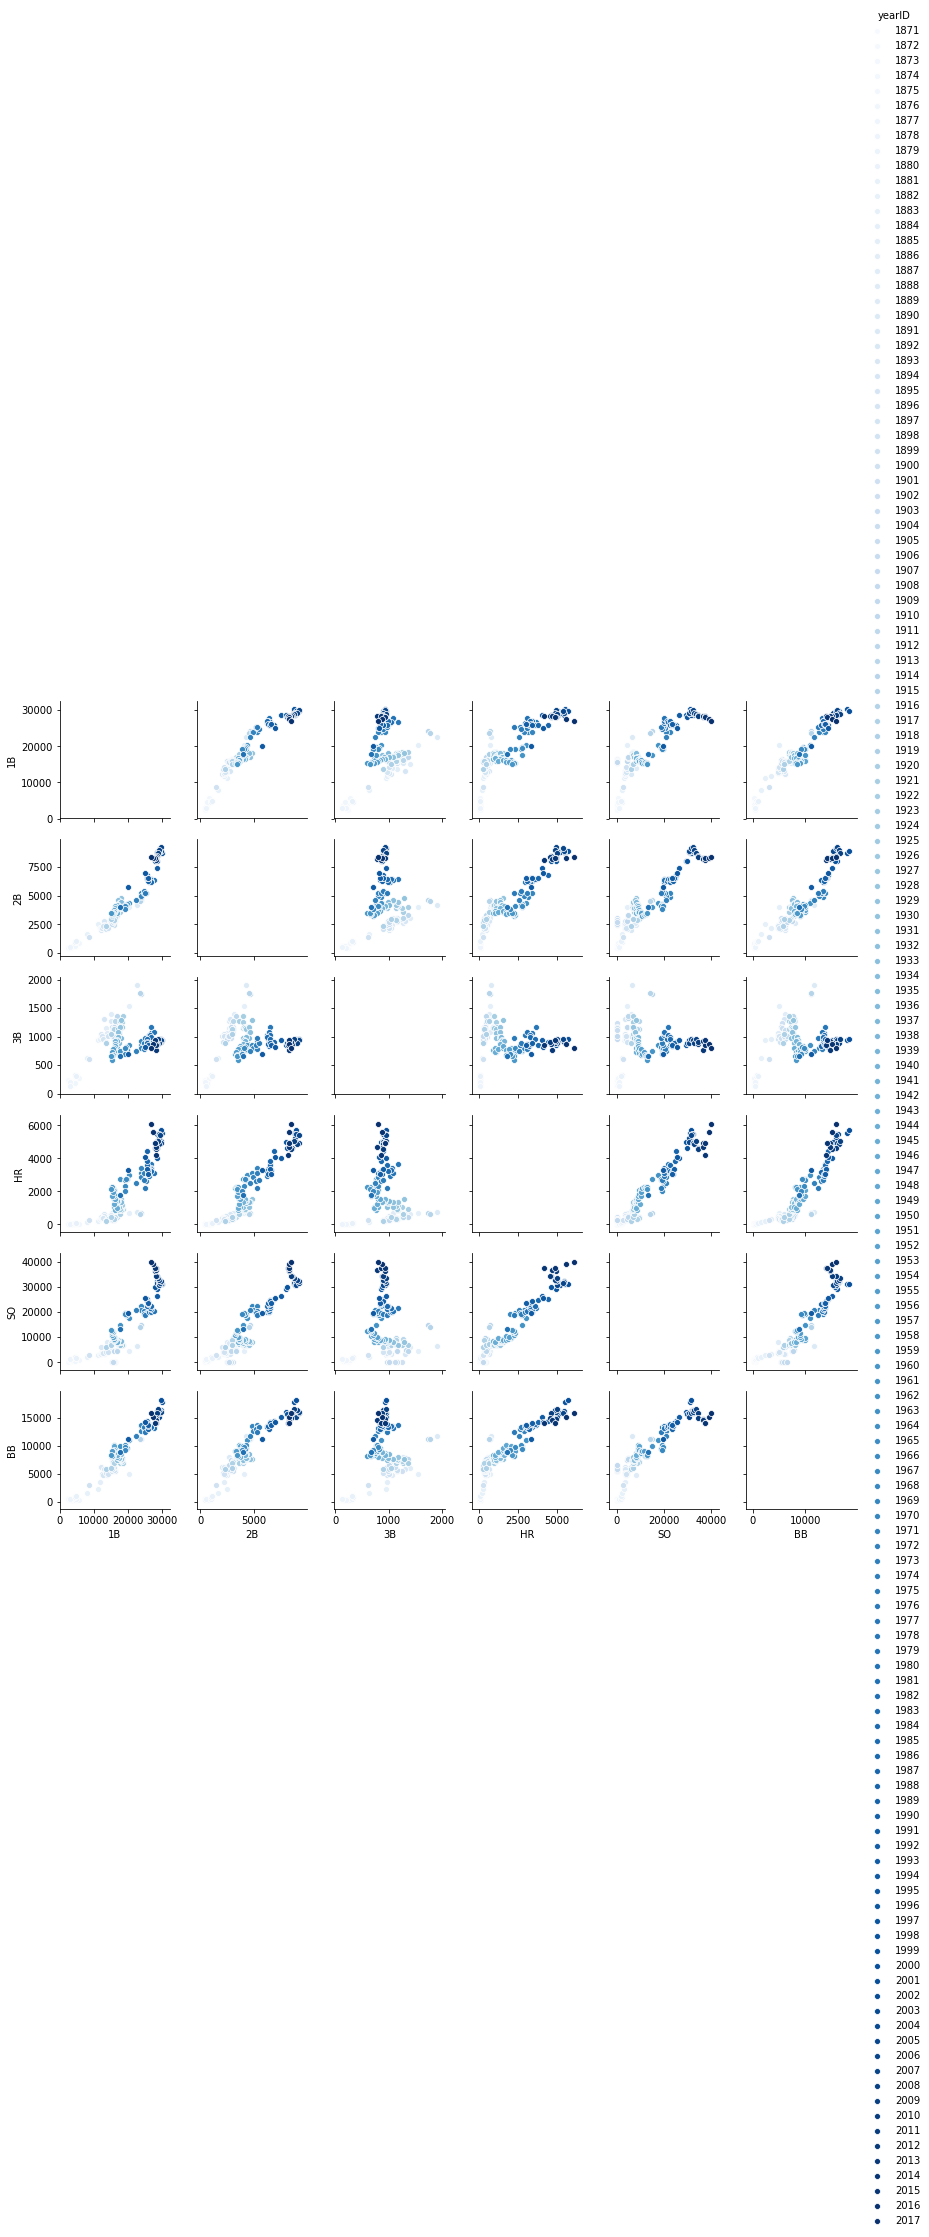

In [13]:
pg = sns.pairplot(batting_by_year, height=2, vars=hit_vars, hue='yearID', palette='Blues')

## The correlation of hitting statistics

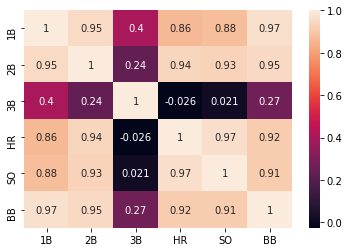

In [14]:
sns.heatmap(batting_by_year[hit_vars].corr(), annot=True)

## Grouping batting data by player

In [15]:
pl_bat = batting.groupby('playerID').sum().reset_index()
bbdfs['CareerBatting'] = pl_bat
pl_bat.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,1B
0,aardsda01,18084,9,331,4,0,0,0,0,0,...,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,...,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,2294
2,aaronto01,13768,7,437,944,102,216,42,6,13,...,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,155
3,aasedo01,25786,13,448,5,0,0,0,0,0,...,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0
4,abadan01,6010,3,15,21,1,2,0,0,0,...,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,2


## Adding more derived data: The Slash Line (BA / OBP / SLG)

In [16]:
pl_bat['BA']= pl_bat['H'] / pl_bat['AB']
pl_bat['OBP'] = (pl_bat['H']+pl_bat['BB']+pl_bat['HBP']) / (pl_bat['AB']+pl_bat['BB']+pl_bat['HBP']+pl_bat['SF'])
pl_bat['SLG'] = (pl_bat['1B']+2*pl_bat['2B']+3*pl_bat['3B']+4*pl_bat['HR']) / pl_bat['AB']
pl_bat.head()

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SO,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG
0,aardsda01,18084,9,331,4,0,0,0,0,0,...,2.0,0.0,0.0,1.0,0.0,0.0,0,0.000000,0.000000,0.000000
1,aaronha01,45195,23,3298,12364,2174,3771,624,98,755,...,1383.0,293.0,32.0,21.0,121.0,328.0,2294,0.304998,0.373949,0.554513
2,aaronto01,13768,7,437,944,102,216,42,6,13,...,145.0,3.0,0.0,9.0,6.0,36.0,155,0.228814,0.291506,0.327331
3,aasedo01,25786,13,448,5,0,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0.000000,0.000000
4,abadan01,6010,3,15,21,1,2,0,0,0,...,5.0,0.0,0.0,0.0,0.0,1.0,2,0.095238,0.240000,0.095238


## Filtering data part 2
### Top all-time slugging percentages (at least 100 AB)

In [17]:
pl_bat[pl_bat.AB >= 100].sort_values(by='SLG', ascending=False).head(30)

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SO,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG
15065,ruthba01,42339,22,2503,8398,2174,2873,506,136,714,...,1330.0,0.0,43.0,113.0,0.0,2.0,1517,0.342105,0.473960,0.689807
18630,willite01,37057,19,2292,7706,1798,2654,525,71,521,...,709.0,86.0,39.0,5.0,20.0,197.0,1537,0.344407,0.481709,0.633792
6115,gehrilo01,32827,17,2164,8001,1888,2721,534,163,493,...,790.0,0.0,45.0,106.0,0.0,2.0,1531,0.340082,0.447352,0.632421
8014,hoskirh01,2017,1,50,170,37,44,7,0,18,...,46.0,1.0,3.0,0.0,2.0,2.0,19,0.258824,0.396226,0.617647
5675,foxxji01,40634,22,2317,8134,1751,2646,458,125,534,...,1311.0,0.0,13.0,71.0,0.0,69.0,1529,0.325301,0.428274,0.609294
1563,bondsba01,43923,22,2986,9847,2227,2935,601,77,762,...,1539.0,688.0,106.0,4.0,91.0,165.0,1495,0.298060,0.444295,0.606885
6660,greenha01,25201,13,1394,5193,1051,1628,379,71,331,...,844.0,0.0,16.0,35.0,0.0,66.0,847,0.313499,0.411813,0.605045
12895,olsonma02,4033,2,70,210,36,51,3,0,24,...,64.0,1.0,5.0,0.0,0.0,7.0,24,0.242857,0.348361,0.600000
903,bassjo01,5620,3,25,100,19,29,2,10,3,...,4.0,0.0,0.0,0.0,0.0,0.0,14,0.290000,0.310680,0.600000
8808,judgeaa01,4033,2,182,626,138,169,26,3,56,...,250.0,11.0,6.0,0.0,5.0,17.0,84,0.269968,0.402329,0.589457


## Sabermetrics: the "Pythagorean" theorem of baseball

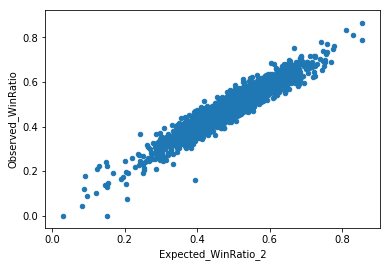

In [18]:
teams['Observed_WinRatio'] = teams.W/teams.G
teams['Expected_WinRatio_183'] = 1 / (1 + (teams.RA/teams.R)**1.83)
teams['Expected_WinRatio_2'] = 1 / (1 + (teams.RA/teams.R)**2)
teams['Overachieving'] = teams['Observed_WinRatio']/teams['Expected_WinRatio_183']
teams['Fraction_Runs'] = teams.R/(teams.R + teams.RA)
teams.plot.scatter('Expected_WinRatio_2', 'Observed_WinRatio')



## Writing all the dataframes to a SQL database

In [19]:
def write_all_tables_to_sqlite(dfs, sql_filename):
    engine = create_engine('sqlite:///{}'.format(sql_filename))
    for table, df in dfs.items():
        df.to_sql(table, con=engine, index=False)
    engine.dispose()
    
sqlite_filename = 'bbdb.sqlite'
try:
    os.remove(sqlite_filename)
except FileNotFoundError:
    pass
write_all_tables_to_sqlite(bbdfs, sqlite_filename)



## Make SQL query to Baseball DB

In [20]:
engine = create_engine('sqlite:///bbdb.sqlite')

top_slugging = pd.read_sql_query('select * from CareerBatting where AB>= 100 order by SLG desc limit 30', engine)
top_slugging

,playerID,yearID,stint,G,AB,R,H,2B,3B,HR,...,SO,IBB,HBP,SH,SF,GIDP,1B,BA,OBP,SLG
0,ruthba01,42339,22,2503,8398,2174,2873,506,136,714,...,1330.0,0.0,43.0,113.0,0.0,2.0,1517,0.342105,0.473960,0.689807
1,willite01,37057,19,2292,7706,1798,2654,525,71,521,...,709.0,86.0,39.0,5.0,20.0,197.0,1537,0.344407,0.481709,0.633792
2,gehrilo01,32827,17,2164,8001,1888,2721,534,163,493,...,790.0,0.0,45.0,106.0,0.0,2.0,1531,0.340082,0.447352,0.632421
3,hoskirh01,2017,1,50,170,37,44,7,0,18,...,46.0,1.0,3.0,0.0,2.0,2.0,19,0.258824,0.396226,0.617647
4,foxxji01,40634,22,2317,8134,1751,2646,458,125,534,...,1311.0,0.0,13.0,71.0,0.0,69.0,1529,0.325301,0.428274,0.609294
5,bondsba01,43923,22,2986,9847,2227,2935,601,77,762,...,1539.0,688.0,106.0,4.0,91.0,165.0,1495,0.298060,0.444295,0.606885
6,greenha01,25201,13,1394,5193,1051,1628,379,71,331,...,844.0,0.0,16.0,35.0,0.0,66.0,847,0.313499,0.411813,0.605045
7,bassjo01,5620,3,25,100,19,29,2,10,3,...,4.0,0.0,0.0,0.0,0.0,0.0,14,0.290000,0.310680,0.600000
8,olsonma02,4033,2,70,210,36,51,3,0,24,...,64.0,1.0,5.0,0.0,0.0,7.0,24,0.242857,0.348361,0.600000
9,judgeaa01,4033,2,182,626,138,169,26,3,56,...,250.0,11.0,6.0,0.0,5.0,17.0,84,0.269968,0.402329,0.589457


## More history: the saga of Home Runs

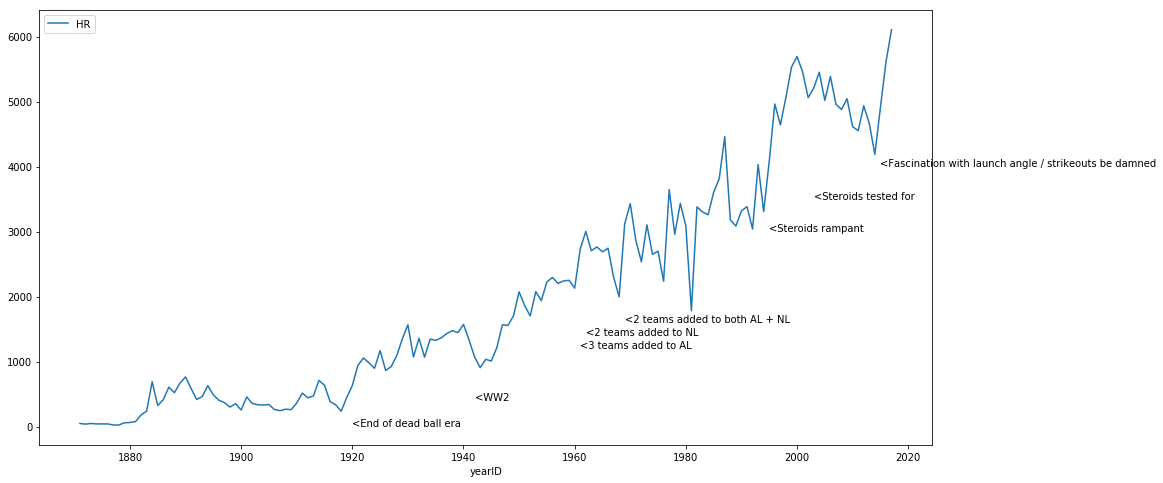

In [21]:
ax = batting_by_year.plot('yearID', 'HR', figsize=(16,8))
annot1920 = plt.text(1920, 0, '<End of dead ball era')
annot1942 = plt.text(1942, 400, '<WW2')
annot1961 = plt.text(1961, 1200, '<3 teams added to AL')
annot1962 = plt.text(1962, 1400, '<2 teams added to NL')
annot1969 = plt.text(1969, 1600, '<2 teams added to both AL + NL')
annot1995 = plt.text(1995, 3000, '<Steroids rampant')
annot2003 = plt.text(2003, 3500, '<Steroids tested for')
annot2015 = plt.text(2015, 4000, '<Fascination with launch angle / strikeouts be damned')

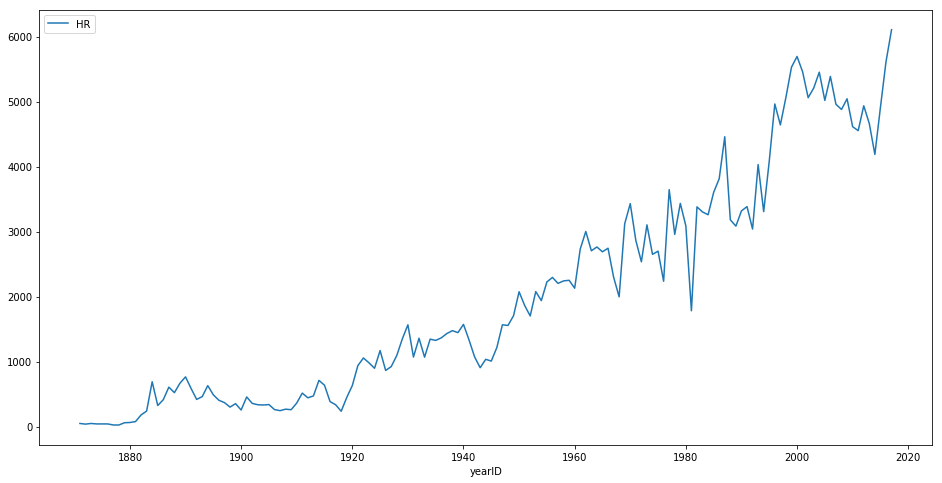

In [22]:
ax = batting_by_year.plot('yearID', 'HR', figsize=(16,8))

## Correcting for demographics: HR per AB

In [23]:
batting_by_year = batting.groupby('yearID').sum().reset_index()
batting_by_year.set_index('yearID', inplace=True)
batting_by_year_perAB = batting_by_year.div(batting_by_year.AB, axis=0).reset_index()
batting_by_year.reset_index(inplace=True)

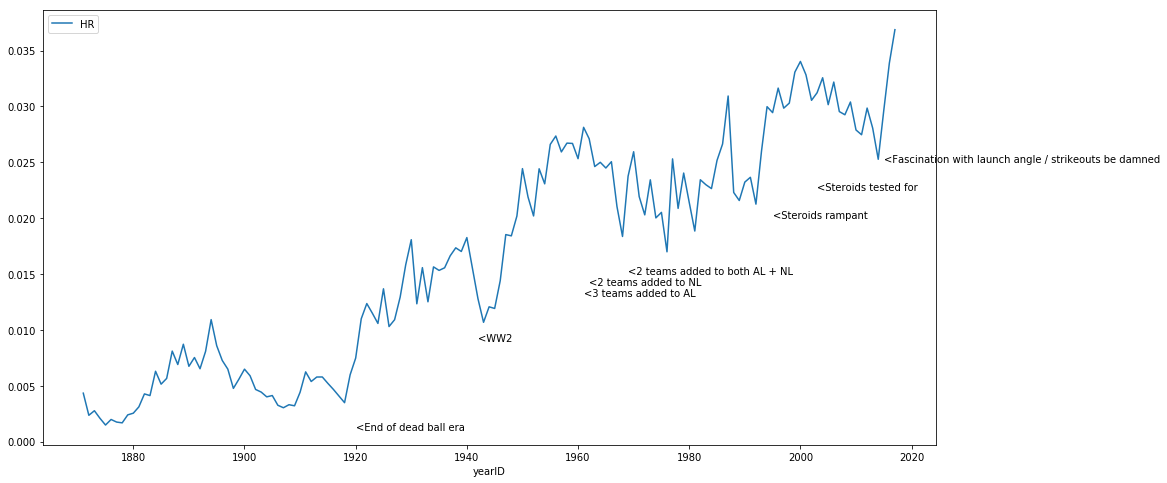

In [24]:
ax = batting_by_year_perAB.plot('yearID', 'HR', figsize=(16,8))
annot1920 = plt.text(1920, 0.001, '<End of dead ball era')
annot1942 = plt.text(1942, 0.009, '<WW2')
annot1961 = plt.text(1961, 0.013, '<3 teams added to AL')
annot1962 = plt.text(1962, 0.014, '<2 teams added to NL')
annot1969 = plt.text(1969, 0.015, '<2 teams added to both AL + NL')
annot1995 = plt.text(1995, 0.020, '<Steroids rampant')
annot2003 = plt.text(2003, 0.0225, '<Steroids tested for')
annot2015 = plt.text(2015, 0.025, '<Fascination with launch angle / strikeouts be damned')

In [25]:
pitching_by_year = pitching.groupby('yearID').sum().reset_index()

In [26]:
pitching_by_year.set_index('yearID', inplace=True)

In [27]:
pitching_by_year_perIPouts = pitching_by_year.div(pitching_by_year.IPouts, axis=0).reset_index()

In [28]:
pitching_by_year_perIPouts

,yearID,stint,W,L,G,GS,CG,SHO,SV,IPouts,...,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
0,1871,0.002815,0.017778,0.017778,0.041037,0.037630,0.034222,0.000593,0.000593,1.0,...,0.000000,0.030815,0.000000,0.000296,1.661481,0.003407,0.393926,0.000000,0.000000,0.000000
1,1872,0.002739,0.018056,0.018056,0.041083,0.037127,0.033171,0.001014,0.000710,1.0,...,0.000000,0.020491,0.000000,0.000203,1.615744,0.003956,0.343883,0.000000,0.000000,0.000000
2,1873,0.002325,0.018319,0.018319,0.040357,0.037009,0.033662,0.000744,0.000837,1.0,...,0.000000,0.011531,0.000000,0.000093,1.608146,0.003348,0.332899,0.000000,0.000000,0.000000
3,1874,0.001359,0.018467,0.018467,0.039172,0.037093,0.035095,0.001199,0.000240,1.0,...,0.000000,0.010153,0.000000,0.000000,1.546247,0.001999,0.277400,0.000000,0.000000,0.000000
4,1875,0.002854,0.018039,0.018039,0.041086,0.037155,0.033439,0.002639,0.000969,1.0,...,0.000000,0.017770,0.000000,0.000269,1.458295,0.003715,0.227990,0.000000,0.000000,0.000000
5,1876,0.002391,0.018076,0.018076,0.040090,0.036573,0.033197,0.003235,0.000914,1.0,...,0.000000,0.013152,0.000000,0.000000,1.444366,0.003376,0.215642,0.000000,0.000000,0.000000
6,1877,0.001954,0.018204,0.018204,0.040625,0.037026,0.033529,0.002057,0.000411,1.0,...,0.000000,0.020775,0.000000,0.000000,1.440810,0.003497,0.209812,0.000000,0.000000,0.000000
7,1878,0.002306,0.018051,0.018051,0.038608,0.036903,0.035299,0.002507,0.000100,1.0,...,0.000000,0.023666,0.000000,0.000000,1.405636,0.001604,0.190935,0.000000,0.000000,0.000000
8,1879,0.001553,0.018170,0.018170,0.038871,0.036916,0.035018,0.002530,0.000115,1.0,...,0.000000,0.020873,0.000000,0.000000,1.418320,0.001898,0.196021,0.000000,0.000000,0.000000
9,1880,0.001879,0.018349,0.018349,0.041782,0.037582,0.033602,0.002819,0.000718,1.0,...,0.000000,0.016248,0.000000,0.000000,1.383939,0.003979,0.176357,0.000000,0.000000,0.000000


In [29]:
pitching_by_year.reset_index(inplace=True)

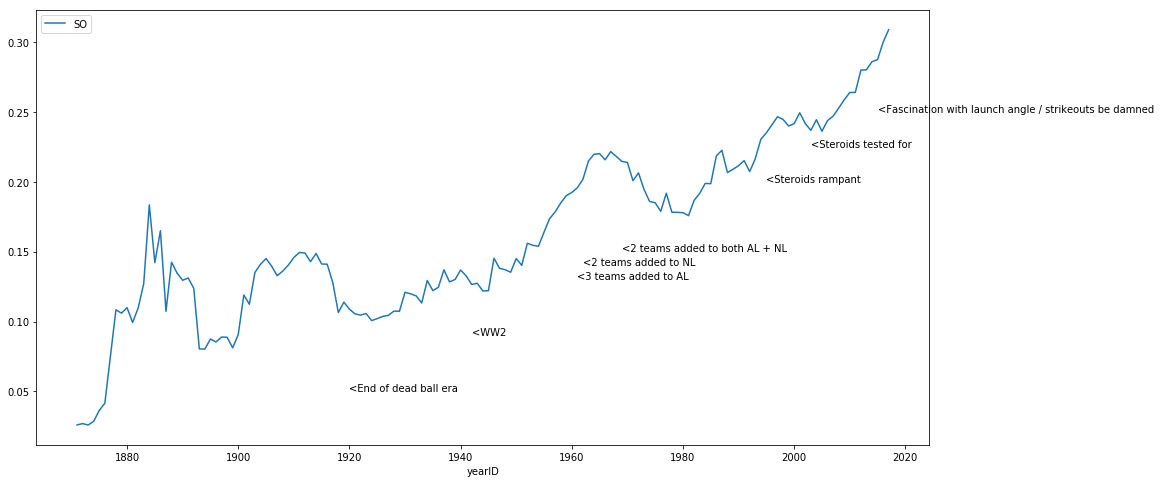

In [30]:
ax = pitching_by_year_perIPouts.plot('yearID', 'SO', figsize=(16,8))
annot1920 = plt.text(1920, 0.05, '<End of dead ball era')
annot1942 = plt.text(1942, 0.09, '<WW2')
annot1961 = plt.text(1961, 0.13, '<3 teams added to AL')
annot1962 = plt.text(1962, 0.14, '<2 teams added to NL')
annot1969 = plt.text(1969, 0.15, '<2 teams added to both AL + NL')
annot1995 = plt.text(1995, 0.20, '<Steroids rampant')
annot2003 = plt.text(2003, 0.225, '<Steroids tested for')
annot2015 = plt.text(2015, 0.25, '<Fascination with launch angle / strikeouts be damned')